In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.cluster import KMeans
from sklearn import preprocessing
import numpy as np
import math
from statistics import mean 
import statistics
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report,confusion_matrix

%matplotlib inline

In [2]:
# dataset best case a2cloud score 
df_train = pd.read_csv("standalone_balanced_a2cloudscore.csv")

# QODE verification dataset  
df_QODE= pd.read_csv("standalone_balanced_a2cloudscore_QODE_runtime_verfi.csv")

df_train

,a2cloud_score,Cost(per hour USD),Instance
0,3.728346,0.0928,t2.large
1,5.071407,0.0832,B2ms
2,4.942641,0.0950,N1s2
3,6.261005,0.0150,Lin.G
4,2.452133,0.1000,c4.large
...,...,...,...
235,3.697601,0.0230,t2.small
236,2.391436,0.0752,t3a.large
237,3.555449,0.0376,t3a.medium
238,10.000000,0.0188,t3a.small


In [3]:
X=df_train.iloc[:,0:2]
model = KMeans(n_clusters = 4)
kmeans=model.fit(X)
labels = kmeans.labels_ # creating classification columns for supervised learning 
labels

array([2, 2, 2, 1, 0, 2, 2, 1, 2, 2, 2, 1, 0, 2, 2, 2, 0, 2, 3, 0, 2, 1,
       1, 1, 0, 2, 2, 1, 2, 2, 1, 1, 0, 2, 2, 2, 0, 2, 3, 0, 0, 3, 2, 0,
       2, 2, 2, 0, 2, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 1, 0, 2,
       2, 1, 2, 2, 2, 1, 0, 2, 2, 2, 0, 2, 3, 0, 2, 2, 2, 1, 0, 2, 2, 1,
       2, 2, 2, 1, 0, 2, 2, 2, 0, 2, 3, 0, 2, 1, 1, 1, 0, 2, 2, 1, 2, 2,
       1, 1, 0, 2, 2, 2, 0, 2, 3, 0, 0, 3, 2, 0, 2, 2, 2, 0, 2, 1, 2, 0,
       0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 1, 0, 2, 2, 1, 2, 2, 2, 1, 0, 2,
       2, 2, 0, 2, 3, 0, 2, 2, 2, 1, 0, 2, 2, 1, 2, 2, 2, 1, 0, 2, 2, 2,
       0, 2, 3, 0, 2, 1, 1, 1, 0, 2, 1, 1, 2, 2, 1, 1, 0, 2, 2, 2, 0, 2,
       3, 0, 0, 3, 2, 0, 2, 2, 2, 0, 2, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0,
       2, 2, 2, 1, 0, 2, 2, 1, 2, 2, 2, 1, 0, 2, 2, 2, 0, 2, 3, 0],
      dtype=int32)

In [4]:
df_train

,a2cloud_score,Cost(per hour USD),Instance
0,3.728346,0.0928,t2.large
1,5.071407,0.0832,B2ms
2,4.942641,0.0950,N1s2
3,6.261005,0.0150,Lin.G
4,2.452133,0.1000,c4.large
...,...,...,...
235,3.697601,0.0230,t2.small
236,2.391436,0.0752,t3a.large
237,3.555449,0.0376,t3a.medium
238,10.000000,0.0188,t3a.small


In [11]:
df_train['cluster']=labels
df_train

,a2cloud_score,Cost(per hour USD),Instance,cluster
0,3.728346,0.0928,t2.large,2
1,5.071407,0.0832,B2ms,2
2,4.942641,0.0950,N1s2,2
3,6.261005,0.0150,Lin.G,1
4,2.452133,0.1000,c4.large,0
...,...,...,...,...
235,3.697601,0.0230,t2.small,2
236,2.391436,0.0752,t3a.large,0
237,3.555449,0.0376,t3a.medium,2
238,10.000000,0.0188,t3a.small,3


In [12]:
df_train.to_csv(r'a2.csv',index=False)
df1 = pd.read_csv("a2.csv")

In [13]:
df1[df1['cluster']==0]= 5
df1[df1['cluster']==1]=7
df1[df1['cluster']==2]= 6
df1[df1['cluster']==3]=8
df1 

,a2cloud_score,Cost(per hour USD),Instance,cluster
0,6.0,6.0,6,6
1,6.0,6.0,6,6
2,6.0,6.0,6,6
3,7.0,7.0,7,7
4,5.0,5.0,5,5
...,...,...,...,...
235,6.0,6.0,6,6
236,5.0,5.0,5,5
237,6.0,6.0,6,6
238,8.0,8.0,8,8


In [14]:
df_train['cluster']=df1['cluster']-4

df_train

,a2cloud_score,Cost(per hour USD),Instance,cluster
0,3.728346,0.0928,t2.large,2
1,5.071407,0.0832,B2ms,2
2,4.942641,0.0950,N1s2,2
3,6.261005,0.0150,Lin.G,3
4,2.452133,0.1000,c4.large,1
...,...,...,...,...
235,3.697601,0.0230,t2.small,2
236,2.391436,0.0752,t3a.large,1
237,3.555449,0.0376,t3a.medium,2
238,10.000000,0.0188,t3a.small,4


In [15]:
corr = df_train.corr()
corr.style.background_gradient(cmap='coolwarm')

,a2cloud_score,Cost(per hour USD),cluster
a2cloud_score,1,-0.110635,0.952679
Cost(per hour USD),-0.110635,1,-0.075571
cluster,0.952679,-0.075571,1


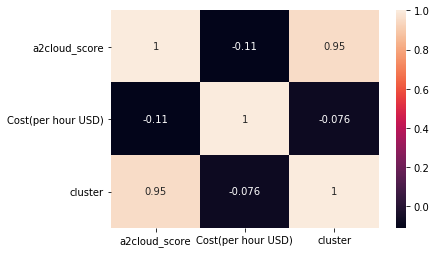

In [16]:
import seaborn as sn
import matplotlib.pyplot as plt
corrMatrix = df_train.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()